> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Appointment that failed to present Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

This Project is analysing Data Set that describes "No-show appointments" in Brazil and Its is focused on the question of whether or not patients show up for their appointment. It contain information from 100k medical appointments. Sample of Record 110527nd No of Columns 14. No Duplicate rows and No NULL Values found.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline






Which Gender is Not Show Up for an appointment More ? Females 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:


df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

# Diamention of Data frame
df.shape

# Find Number of Null values
df.isnull().sum()

# Find Number of Duplicatre Values
df.duplicated().sum()

#Find Std and Mean
df.describe()


# Find the Age values
df['Age'].value_counts()

# Data Type for Data Frame
df.dtypes

# Find the Object Data Type
type(df['ScheduledDay'][0])
type(df['AppointmentDay'][0])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [5]:


#Change String to Date Time
#df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])


#Change tString to Date Time
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])


#Removing Age less than 0 from data set
df = df[df['Age'] >= 1]
df.describe()

# Drop columns that are not necessory
#df.drop(['Neighbourhood'], axis=1, inplace=True)
df.head()


df.rename(columns={'No-show': 'No_show'}, inplace=True)
#Pations Not Show Up vs Age

NoTShown = df.No_show == "Yes"
df.Age[NoTShown].mean()

#Pations Showed up vs Age
Shown = df.No_show =="No"
df.Age[Shown].mean()




39.07518726482

In [11]:
#Create 2 diffrent data frame(df_SC, df_NSC) according to Scholership

#df.rename(columns={'No-show' : 'No_show'}, inplace=True)
df.head()
df_SC = df.query('Scholarship == "0"')
df_SC.shape
df_NSC = df.query('Scholarship == "1"')
df_NSC.shape

(10809, 14)

Check which group  Missed the appointment most (Scholarship or Non Scholarship)

In [13]:


# Scholaship Group Not show Up
df_SC.query('No_show == "Yes"')
df.shape    #----> 96178

# Non_Scholaship Group Non show Up
df_NSC.query('No_show == "Yes"')
#df_NSC.shape  # ---> 10809

# Most of the Scholership pations are miss the appointment

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
31,3.112849e+11,5628907,M,2016-04-27T12:07:14Z,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
51,4.694699e+13,5534635,F,2016-03-31T17:05:31Z,2016-04-29 00:00:00+00:00,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
52,7.987570e+14,5534639,F,2016-03-31T17:06:17Z,2016-04-29 00:00:00+00:00,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
123,3.673278e+13,5621388,F,2016-04-26T10:12:46Z,2016-04-29 00:00:00+00:00,31,BELA VISTA,1,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110238,8.937375e+11,5747054,F,2016-05-30T14:56:51Z,2016-06-08 00:00:00+00:00,40,JABOUR,1,0,0,0,0,1,Yes
110351,4.483937e+13,5371807,F,2016-02-19T14:12:52Z,2016-06-01 00:00:00+00:00,27,RESISTÊNCIA,1,0,0,0,0,1,Yes
110400,8.382848e+11,5739407,F,2016-05-25T13:29:23Z,2016-06-07 00:00:00+00:00,36,RESISTÊNCIA,1,0,0,0,0,1,Yes
110479,4.455244e+12,5638153,F,2016-04-29T07:45:43Z,2016-06-06 00:00:00+00:00,34,RESISTÊNCIA,1,0,0,0,0,1,Yes


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

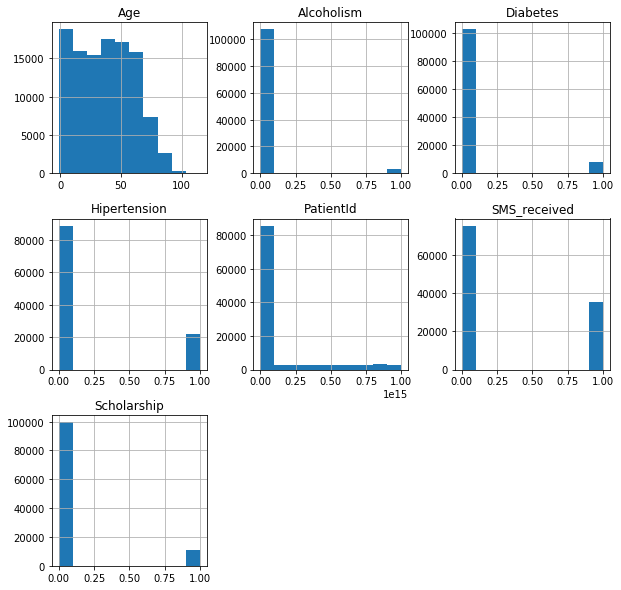

In [108]:
#Age variable is skewed to the right
#Appointment ID variable is skewed to the right

df.hist(figsize=(10,10));

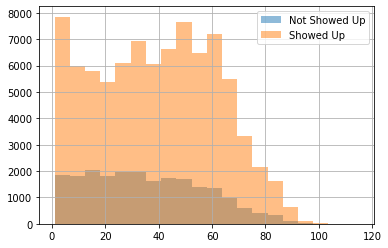

In [16]:
import matplotlib.pyplot as plt

df.head()
# Appointment Showed up or Not vs Age

df.Age[NoTShown].hist(alpha=0.5, bins=20, label='Not Showed Up')
df.Age[Shown].hist(alpha=0.5, bins=20,label='Showed Up' )
plt.legend();


                      


### Research Question 2  (Replace this header name!)

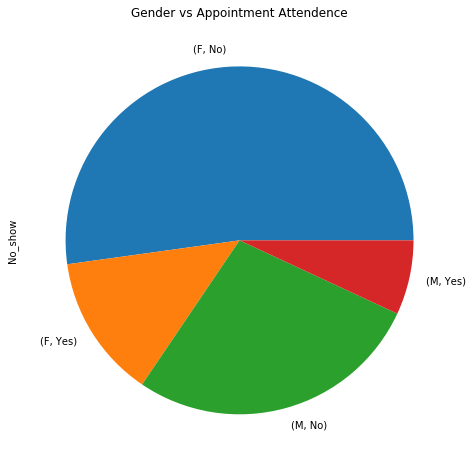

In [17]:
#df['Gender'].value_counts().plot(kind='pie', figsize=(8,8))

# Gender vs Showed up or NoT
df.groupby('Gender')['No_show'].value_counts().plot(kind='pie', figsize=(8,8), title='Gender vs Appointment Attendence')


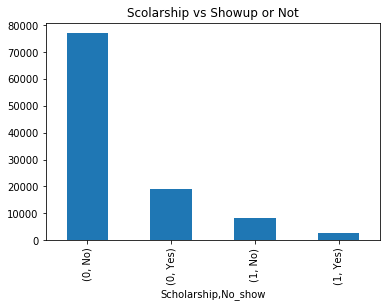

In [111]:
df.groupby('Scholarship')['No_show'].value_counts().plot(kind='bar', title= "Scolarship vs Showup or Not")

<a id='conclusions'></a>
## Conclusions

Most of the females booked the appointment and Most of them are showed up for an appointment. Few People has Scolership appointment. Age More than 85 are not showed up ( right to the skwed). Kids(age up to 8) showed up more. Age 25 to 25 are Not showed up for an appointment. 